# Calculating the neutron spectrum from a custom lineshape

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import PyCrystalField as cef

### First we generate the Hamiltonian (for this example, we use  Er2Ge2O7) and plot the spectrum with the default Voigt profile:

In [2]:
### Define CEF Hamiltonian as Er2Ge2O7, from Gaudet et al, PRB (2018) 
### https://doi.org/10.1103/PhysRevB.97.024415
Adictionary = {'A20':39.3, 'A40':36.2, 'A43':275, 'A60':1.23, 'A63':-19.1, 'A66':26.6 }

# Convert from Wybourne to Stevens operators
Bdictionary = cef.WybourneToStevens('Er3+',Adictionary)

# Create CEF Hamiltonian
EGO = cef.CFLevels.Bdict('Er3+',Bdictionary)

<IPython.core.display.Javascript object>


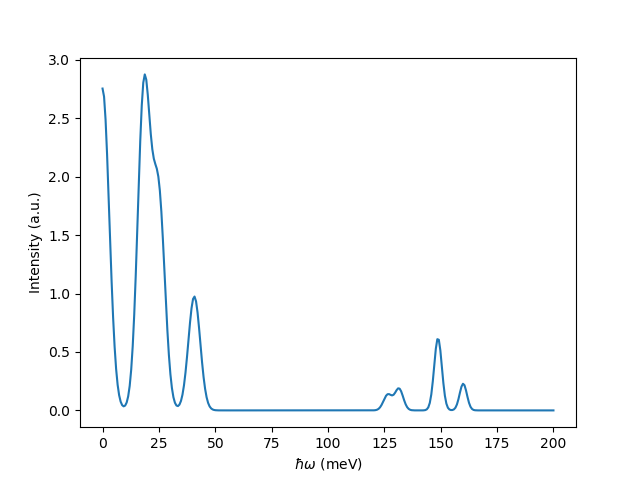

Text(0, 0.5, 'Intensity (a.u.)')

In [3]:
####################################
### calculate the Default neutron spectrum
xx = np.linspace(0,200,300)
plt.figure()
# yy = EGO.neutronSpectrum(Earray=xx, Temp=5, Ei=200, ResFunc=lambda x: 7-0.02*x)
yy = EGO.normalizedNeutronSpectrum(Earray=xx, Temp=5, ResFunc=lambda x: 7-0.02*x)
plt.plot(xx,yy)
plt.xlabel('$\\hbar \\omega$ (meV)')
plt.ylabel('Intensity (a.u.)')

### We define a custom lineshape which is asymmetric:

<IPython.core.display.Javascript object>


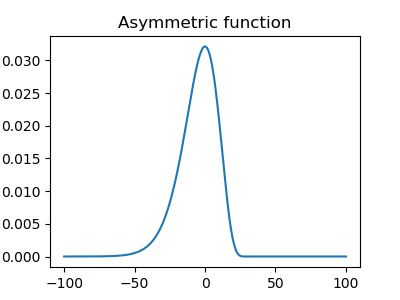

Text(0.5, 1.0, 'Asymmetric function')

In [4]:
## Custom lineshape:
def AsymmetricFunction(x,b,a):
    '''Asymmetric function, roughly approximating  the Ikeda-Carpenter 
    lineshape. b defines the width, a defines the asymmetry.'''
    t=-x+a*b
    out = t**a*np.exp(-t/b)
    out[t<0] = 0
    
    # normalize
    dt = np.abs(np.mean(t[1:]-t[:-1]))
    normt = np.arange(-3*a*b, 5*a*b, dt)
    normout = normt**a*np.exp(-normt/b)
    normout[normt<0] = 0
    norm = np.nansum(normout)*dt
    if norm > 0:
        return out/norm
    else:
        return out


## Plot the lineshape
ttt = np.linspace(-100,100,400)
testIC = AsymmetricFunction(ttt, 5, 6)
plt.figure(figsize=(4,3))
plt.plot(ttt, testIC)
plt.title('Asymmetric function')

### Now we define a Lineshape function based off this asymmetric profile, which returns the lineshape for a given energy array as a function of energy (hw):

<IPython.core.display.Javascript object>


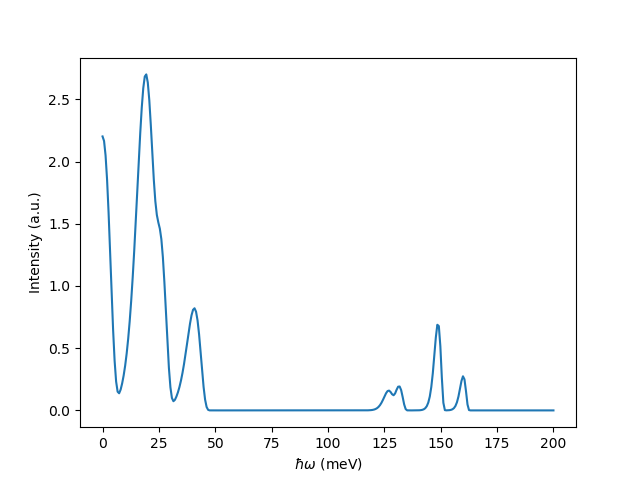

Text(0, 0.5, 'Intensity (a.u.)')

In [5]:
###################### define for PyCrystalField

def LineshapeFunction(x, hw):
    '''Defines the lineshape as a function of mode energy (hw).
    Resonance gets narrower as energy increases. We could also make 
    this more complicated and adjust the asymmetry as a function of
    energy if we wanted.'''
    return AsymmetricFunction(x, 1.5-0.006*hw, 6)


xx = np.linspace(0,200,300)
plt.figure()
yy = EGO.normalizedNeutronSpectrum_customLineshape(Earray=xx, Temp=5, 
                                                   LineshapeFunc = LineshapeFunction)
# yy = EGO.neutronSpectrum_customLineshape(Earray=xx, Temp=5, Ei=200,
#                                                    LineshapeFunc = LineshapeFunction)
plt.plot(xx,yy)
plt.xlabel('$\\hbar \\omega$ (meV)')
plt.ylabel('Intensity (a.u.)')

The LineshapeFunc can give any profile you choose---but note that complicated functions can slow down the fits.